In [1]:
import pandas as pd
import glob
list_files=glob.glob('./Desktop/data2/recordings+7.14+Luc/*.txt') 
data2=glob.glob('./Desktop/data2/*.txt') 

In [2]:
data= list_files[::2]  

In [3]:
def tabulate_data2(file):
    list_sensors=['gyroX','gyroY','gyroZ','lowAccelX','lowAccelY','lowAccelZ', 'highAccelX','highAccelY','highAccelZ']
    f = open(file,'rt')
    remove_trackerName= [line.replace('T7L,', "") for line in f.readlines()]
    file_as_list= [[token.split(',') for token in line.split(';')] for line in remove_trackerName][0]
    file_as_list=sum([l for l in file_as_list], []) #flattens the nested list comprehension into one list
    chunks= [file_as_list[i:i+9] for i in range(0,len(file_as_list),9)]
    data=pd.DataFrame(chunks).apply(pd.to_numeric, errors='coerce')
    data.columns=list_sensors 
    return data   

In [4]:
hwh= tabulate_data2(data[0]) 
hwl= tabulate_data2(data[1]) 
hwm= tabulate_data2(data[2]) 
jch= tabulate_data2(data[5])
jcl= tabulate_data2(data[6])
jcm= tabulate_data2(data[7])
bc10=tabulate_data2(data2[0])
dh8= tabulate_data2(data2[1])
dh9= tabulate_data2(data2[2]) 
kb40=tabulate_data2(data2[3]) 
hwh['sport']= 'hwh' 
hwl['sport']= 'hwl'
hwm['sport']= 'hwm'
jch['sport']= 'jch'
jcl['sport']= 'jcl'
jcm['sport']= 'jcm'
bc10['sport']= 'bc10'
dh8['sport']= 'dh8'
dh9['sport']= 'dh9'
kb40['sport']= 'kb40'   

In [7]:
n=0.8
tv_split=int(len(hwh)*n)
train_hwh=hwh[:tv_split]
test_hwh=hwh[tv_split:]     

tv_split= int(len(hwl)*n)
train_hwl= hwl[:tv_split]
test_hwl= hwl[tv_split:]

tv_split= int(len(hwm)*n)
train_hwm=hwm[:tv_split]
test_hwm= hwm[tv_split:] 

tv_split=int(len(jch)*n)
train_jch= jch[:tv_split]
test_jch= jch[tv_split:]

tv_split= int(len(jcl)*n)
train_jcl= jcl[:tv_split]
test_jcl= jcl[tv_split:]

tv_split=int(len(jcm)*n)
train_jcm= jcm[:tv_split]
test_jcm= jcm[tv_split:]

tv_split= int(len(bc10)*n)
train_bc10= bc10[:tv_split]
test_bc10= bc10[tv_split:]

tv_split= int(len(dh8)*n)
train_dh8= dh8[:tv_split]
test_dh8= dh8[tv_split:]

tv_split= int(len(dh9)*n)
train_dh9= dh9[:tv_split]
test_dh9= dh9[tv_split:]

tv_split= int(len(kb40)*n)
train_kb40= kb40[:tv_split]
test_kb40= kb40[tv_split:]  

In [8]:
import pandas as pd 
data= pd.concat([train_hwh, train_hwl, train_hwm, train_jch, train_jcm,train_jcl,train_jcm,
                   train_bc10, train_dh8, train_dh9, train_kb40], ignore_index= True)
X_train= data.iloc[:,:-1] 
y_train= data.iloc[:,-1:] 
data_test= pd.concat([test_hwh, test_hwl, test_hwm, test_jch, test_jcm, test_jcl, test_jcm,
                     test_bc10, test_dh8, test_dh9, test_kb40], ignore_index= True) 
X_test= data_test.iloc[:,:-1]
y_test= data_test.iloc[:,-1:]
type(X_train) 
X_train.to_csv('X_train') 
y_train.to_csv('y_train') 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)    

(27824, 9) (27824, 1) (6967, 9) (6967, 1)


In [9]:
X_train.tail()   

,gyroX,gyroY,gyroZ,lowAccelX,lowAccelY,lowAccelZ,highAccelX,highAccelY,highAccelZ
27819,-4015.0,335.0,210.0,-1859.0,3924.0,-923.0,-585.0,792.0,308.0
27820,-3950.0,-254.0,326.0,-1669.0,3811.0,-1067.0,-566.0,781.0,294.0
27821,-3805.0,-970.0,309.0,-1752.0,4064.0,-872.0,-575.0,806.0,313.0
27822,-3642.0,-1706.0,468.0,-1486.0,3926.0,-146.0,-548.0,792.0,386.0
27823,-3714.0,-1978.0,550.0,-1638.0,3844.0,952.0,-563.0,784.0,495.0


In [10]:
import seaborn as sns
import numpy as np
X_train_mean = np.mean(X_train, axis=1)
X_train_std = np.std(X_train, axis=1)
X_test_mean = np.mean(X_test, axis=1)
X_test_std = np.std(X_test, axis=1)  

(2320,) (2320,) (2320,) (2320,) (2320,) (2320,) (2320,) (2320,) (2320,)


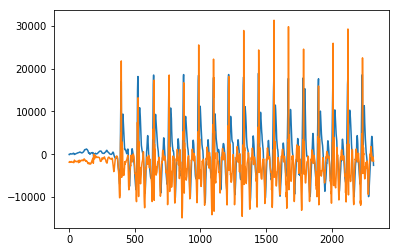

In [11]:
#gyroX= train_hwh.gyroX 
#for i in range(len(train_hwh.columns)): 
#train_hwh[train_hwh.columns][i]  
gyroX= train_hwh.gyroX
gyroY= train_hwh.gyroY
gyroZ= train_hwh.gyroZ
lowAccelX= train_hwh.lowAccelX
lowAccelY= train_hwh.lowAccelY
lowAccelZ= train_hwh.lowAccelZ
highAccelX= train_hwh.highAccelX
highAccelY= train_hwh.highAccelY
highAccelZ= train_hwh.highAccelZ 
print (gyroX.shape, gyroY.shape, gyroZ.shape, lowAccelX.shape, lowAccelY.shape, lowAccelZ.shape,
       highAccelX.shape, highAccelY.shape, highAccelZ.shape)  
train_hwh.to_csv('./Desktop/train_hwh') 
import matplotlib.pyplot as plt 
plt.plot(train_hwh.index, gyroX, lowAccelX)  
plt.show() #viz each features by all the labels   

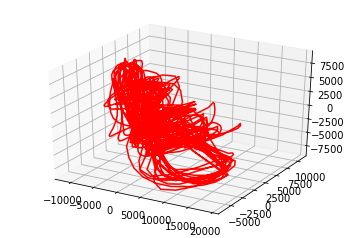

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(gyroX,gyroY,gyroZ,c='red')
plt.show()  

In [ ]:
#! pip install cufflinks --upgrade 
#! pip install plotly --upgrade   

In [13]:
import plotly.plotly as py 
import cufflinks as cf 
import pandas as pd 
import numpy as np 
print (cf.__version__)    
#help(df.iplot)  

0.13.0


/Applications/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/Applications/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [14]:
train_hwh.index 

RangeIndex(start=0, stop=2320, step=1)

In [15]:
train_hwh.columns 

Index(['gyroX', 'gyroY', 'gyroZ', 'lowAccelX', 'lowAccelY', 'lowAccelZ',
       'highAccelX', 'highAccelY', 'highAccelZ', 'sport'],
      dtype='object')

In [16]:
df= pd.DataFrame(index= train_hwh.index, columns= list(train_hwh.columns)) 

In [17]:
df= pd.read_csv('./Desktop/train_hwh', parse_dates= True, index_col=0) 
#df.head(100)   

<h1>Data normalization</h1> 

<p> normalization refers to rescaling real valued numeric attributes into the range 0 and 1
it's useful to scale the input attributes for the model that relies on the magnitude of values, such as distance measures used in k-nearest neighbours and in the preparation of the coefficients in the regression</p> 

In [18]:
from sklearn import preprocessing 
import numpy as np 
import pandas as pd 
#preprocessing.normalize()
#preprocessing.scale()  

In [19]:
train_hwh.head()  

,gyroX,gyroY,gyroZ,lowAccelX,lowAccelY,lowAccelZ,highAccelX,highAccelY,highAccelZ,sport
0,-62.0,-283.0,47.0,-1852.0,-336.0,820.0,-585.0,367.0,482.0,hwh
1,-73.0,-293.0,40.0,-1811.0,-356.0,808.0,-581.0,365.0,480.0,hwh
2,-83.0,-300.0,40.0,-1793.0,-367.0,762.0,-579.0,364.0,476.0,hwh
3,-87.0,-303.0,40.0,-1758.0,-399.0,708.0,-575.0,361.0,470.0,hwh
4,-59.0,-274.0,40.0,-1702.0,-427.0,641.0,-570.0,358.0,464.0,hwh


In [20]:
data.columns 

Index(['gyroX', 'gyroY', 'gyroZ', 'lowAccelX', 'lowAccelY', 'lowAccelZ',
       'highAccelX', 'highAccelY', 'highAccelZ', 'sport'],
      dtype='object')

In [21]:
import os
class col_core:
    def __init__(self,col_name,save_dir = ".matchbox/fields",debug=False):
        os.system("mkdir -p %s"%(save_dir))
        self.col_name = col_name
        self.debug = debug
        self.save_dir = save_dir
        if self.save_dir[-1]!="/": self.save_dir+="/"
            
        self.meta = dict()
    
    def save_meta(self):
        np.save(self.save_dir+str(self.col_name)+".npy",self.meta)
        
    def set_meta(self,meta=None):
        """
        pass meta dict values to obj attributes
        """
        if meta == None: meta = self.meta
        for k,v in meta.items():
            if self.debug: print("setting:\t%s\t%s"%(k,v))
            setattr(self,k,v)
        
    def load_meta(self,path=None):
        if path==None:
            path = self.save_dir+str(self.col_name)+".npy"
        self.meta = np.load(path).tolist()
        self.set_meta(self.meta)
        
        if self.meta["coltype"] == "tabulate": self.make_sub() # make sub-objects out of meta
        
    def make_meta(self):
        for attr in self.make_meta_list:
            self.meta[attr]  = getattr(self,attr)
            
    def check_dim(self,data):
        return pd.DataFrame(data,columns=self.dim_names)
    
class categorical(col_core):
    def __init__(self,col_name,save_dir = ".matchbox/fields"):
        super(categorical,self).__init__(col_name, save_dir)
        self.coltype = "categorical"
        self.make_meta_list = ["col_name","coltype","idx2cate","cate2idx","width","eye","dim_names"]
        
    def build(self,pandas_s,max_ = 20):
        assert max_>1, "max should be bigger than 1"
        
        vcount = pd.DataFrame(pandas_s.value_counts())
        
        print(vcount)
        
        self.cate_full = list(vcount.index.tolist())
        self.cate_list = self.cate_full[:max_-1]
        
        # build dictionary
        self.idx2cate = dict((k,v) for k,v in enumerate(self.cate_list))
        self.idx2cate.update({len(self.cate_list):"_other"})
        
        self.cate2idx = dict((v,k) for k,v in self.idx2cate.items())
        self.eye = np.eye(len(self.cate2idx))
        
        self.width = len(self.cate2idx)
        
        self.dim_names = list("%s -> %s"%(self.col_name,k) for k in self.cate2idx.keys())
        self.make_meta()
        
    def trans2idx(self,cate):
        """Translate category to index
        """
        try:
            return self.cate2idx[cate]
        except:
            return self.cate2idx["_other"]
        
    def prepro_idx(self,pandas_s):
        return pandas_s.apply(self.trans2idx)
    
    def prepro(self,pandas_s):
        return self.eye[self.prepro_idx(pandas_s).values]
    
class categorical_idx(col_core):
    def __init__(self,col_name,save_dir = ".matchbox/fields"):
        super(categorical_idx,self).__init__(col_name, save_dir)
        self.coltype = "categorical_idx"
        self.dim_names = [self.col_name]
        self.width = 1
        self.make_meta_list = ["col_name","coltype","idx2cate","cate2idx","width","dim_names"]
        
    def build(self,pandas_s,max_ = 20):
        assert max_>1, "max should be bigger than 1"
        
        vcount = pd.DataFrame(pandas_s.value_counts())
        
        print(vcount)
        
        self.cate_full = list(vcount.index.tolist())
        self.cate_list = self.cate_full[:max_-1]
        
        # build dictionary
        self.idx2cate = dict((k,v) for k,v in enumerate(self.cate_list))
        self.idx2cate.update({len(self.cate_list):"_other"})
        
        self.cate2idx = dict((v,k) for k,v in self.idx2cate.items())
        
        self.make_meta()
        
    def trans2idx(self,cate):
        try:
            return self.cate2idx[cate]
        except:
            return self.cate2idx["_other"]
        
    def prepro(self,pandas_s, expand=True):
        x = pandas_s.apply(self.trans2idx).values
        if expand:x = np.expand_dims(x,-1)
        return x
    
class minmax(col_core):
    def __init__(self,col_name,fillna=0.0,save_dir = ".matchbox/fields"):
        """minmax scaler: scale to 0~1"""
        super(minmax,self).__init__(col_name, save_dir)
        self.coltype = "minmax"
        self.fillna = fillna
        self.dim_names = [self.col_name]
        self.width = 1
        self.make_meta_list = ["col_name","coltype","min_","max_","range","width","dim_names"]   
        
    def build(self,pandas_s=None,min_=None,max_=None):
        if type(pandas_s) != pd.core.series.Series:
            assert (min_!=None) and (max_!=None), "If no pandas series is set you have to set min_,max_ value"
            self.min_ = min_
            self.max_ = max_
            
        else:
            pandas_s = pandas_s.fillna(self.fillna)
            if min_ == None:
                self.min_ = pandas_s.min()
            else:
                self.min_ = min_
            if max_ == None:
                self.max_ = pandas_s.max()
            else:
                self.max_ = max_
                
        self.range = self.max_-self.min_
        assert self.range!=0, "the value range is 0"
        print("min_:%.3f \tmax_:%.3f\t range:%.3f"%(self.min_,self.max_,self.range))
        self.make_meta()
        
    def prepro(self,data,expand=True):
        x = (np.clip(data.values,self.min_,self.max_)-self.min_)/self.range
        if expand:x = np.expand_dims(x,-1)
        return x
        
class tabulate(col_core):
    def __init__(self,table_name,save_dir = ".matchbox/fields"):
        super(tabulate,self).__init__(table_name, save_dir)
        self.coltype = "tabulate"
        self.cols=dict()
        
        self.save_dir = save_dir
        if self.save_dir[-1] != "/":
            self.save_dir = "%s/"%(self.save_dir)
        
        self.make_meta_list = ["col_name","coltype","cols","dim_names"]
        
    def build_url(self,metalist):
        for url in metalist:
            meta_dict = np.load(url).tolist()
            self.cols[meta_dict["col_name"]] = meta_dict
        self.make_dim()
        self.make_meta()
        
    def build(self,*args):
        for obj in args:
            self.cols[obj.col_name] = obj.meta
        self.make_sub()
        self.make_dim()
        self.make_meta()
            
    def make_col(self,meta):
        """
        creat sub obj according to sub meta
        """
        col_name = meta["col_name"]
        
        setattr(self,col_name,eval(meta["coltype"])(col_name))
        getattr(self,col_name).set_meta(meta)
        if meta["coltype"] == "tabulate": 
            getattr(self,col_name).make_sub()
            getattr(self,col_name).meta = meta
        
    def make_sub(self):
        """
        create sub-objects according to meta
        """
        for k,meta in self.cols.items():
            self.make_col(meta)
        
    def make_dim(self):
        self.dim_names = []
        
        for k,meta in self.cols.items():
            for sub_dim in meta["dim_names"]:
                self.dim_names.append("%s -> %s"%(self.col_name, sub_dim))
            
        self.width = len(self.dim_names)
        
    def prepro(self,data):
        """
        data being a pandas dataframe
        """
        data_list = []
        
        for k,v in self.meta["cols"].items():
            # preprocess the data for every column
            col = getattr(self,k)
            if v["coltype"] == "tabulate":
                data_list.append(col.prepro(data))
            else:
                data_list.append(col.prepro(data[k]))
        return np.concatenate(data_list,axis = 1)  

In [22]:
sport= categorical('sport')     

In [23]:
df2= tabulate('df2')
y=sport.build(data.sport)   

      sport
kb40   5440
dh8    3400
dh9    3312
jch    2848
jcm    2592
bc10   2536
hwh    2320
hwl    2120
hwm    2032
jcl    1224


In [24]:
sport.prepro(data['sport'])[:5,:]    

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [25]:
sport.save_meta()     

In [26]:
sport.load_meta()    

In [27]:
gyrox= minmax('gyroX') 
gyrox.build(data['gyroX']) 
gyrox.save_meta()  

min_:-31071.000 	max_:28414.000	 range:59485.000


In [28]:
gyrox.prepro(data['gyroX'])       

array([[0.52129108],
       [0.52110616],
       [0.52093805],
       ...,
       [0.45836766],
       [0.46110784],
       [0.45989745]])

In [29]:
gyroy= minmax('gyroY') 
gyroy.build(data['gyroY'])
gyroy.save_meta() 
gyroz= minmax('gyroZ')
gyroz.build(data['gyroZ']) 
gyroz.save_meta()   
lowaccelx= minmax('lowAccelX') 
lowaccelx.build(data['lowAccelX']) 
lowaccely=minmax('lowAccelY')
lowaccely.build(data['lowAccelY']) 
lowaccelz= minmax('lowAccelZ') 
lowaccelz.build(data['lowAccelZ']) 
highaccelx= minmax('highAccelX') 
highaccelx.build(data['highAccelX']) 
highaccely= minmax('highAccelY')
highaccely.build(data['highAccelY'])
highaccelz= minmax('highAccelZ') 
highaccelz.build(data['highAccelZ'])  

min_:-32511.000 	max_:32001.000	 range:64512.000
min_:-30194.000 	max_:32001.000	 range:62195.000
min_:-31650.000 	max_:32596.000	 range:64246.000
min_:-31491.000 	max_:32740.000	 range:64231.000
min_:-32740.000 	max_:32760.000	 range:65500.000
min_:-31490.000 	max_:32257.000	 range:63747.000
min_:-30980.000 	max_:27900.000	 range:58880.000
min_:-31489.000 	max_:30212.000	 range:61701.000


In [30]:
df=tabulate('df') 
df.build(gyrox, gyroy,gyroz, lowaccelx, lowaccely, lowaccelz,
         highaccelx,highaccely,highaccelz) 
X=df.prepro(data) 
X  

array([[0.52129108, 0.49956597, 0.4862288 , ..., 0.48480713, 0.53238791,
        0.51816016],
       [0.52110616, 0.49941096, 0.48611625, ..., 0.48486988, 0.53235394,
        0.51812775],
       [0.52093805, 0.49930246, 0.48611625, ..., 0.48490125, 0.53233696,
        0.51806292],
       ...,
       [0.45836766, 0.48891679, 0.49044135, ..., 0.484964  , 0.53984375,
        0.51542114],
       [0.46110784, 0.47750806, 0.49299783, ..., 0.48538755, 0.53960598,
        0.51660427],
       [0.45989745, 0.47329179, 0.49431626, ..., 0.48515224, 0.53947011,
        0.51837085]])

In [31]:
df.check_dim(X)  
#x= len(data.gyroX) 
#data['ts']=data.ts.apply(lambda x: int(x/10)) 

,df -> gyroX,df -> gyroY,df -> gyroZ,df -> lowAccelX,df -> lowAccelY,df -> lowAccelZ,df -> highAccelX,df -> highAccelY,df -> highAccelZ
0,0.521291,0.499566,0.486229,0.463811,0.485046,0.512366,0.484807,0.532388,0.518160
1,0.521106,0.499411,0.486116,0.464449,0.484735,0.512183,0.484870,0.532354,0.518128
2,0.520938,0.499302,0.486116,0.464729,0.484564,0.511481,0.484901,0.532337,0.518063
3,0.520871,0.499256,0.486116,0.465274,0.484065,0.510656,0.484964,0.532286,0.517966
4,0.521342,0.499705,0.486116,0.466146,0.483629,0.509634,0.485042,0.532235,0.517868
5,0.522367,0.501891,0.486181,0.464667,0.485591,0.507695,0.484901,0.532439,0.517658
6,0.523039,0.504635,0.486534,0.464776,0.485077,0.507053,0.484901,0.532388,0.517593
7,0.523611,0.506340,0.487113,0.464589,0.485576,0.507817,0.484886,0.532439,0.517674
8,0.524082,0.507673,0.487531,0.464247,0.485513,0.509038,0.484854,0.532439,0.517804
9,0.524317,0.508138,0.487724,0.464029,0.485202,0.510198,0.484839,0.532405,0.517917


In [32]:
df.save_meta()  

In [ ]:
df_load= tabulate('check_load')  

In [ ]:
#df_load.load_meta('.matchbox/fields/.npy')   

In [33]:
from keras.layers import *
from keras.models import *
from keras.optimizers import Adam 

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [34]:
y= data.values[...,-1]  
sports=list(set(y.tolist())) 
sport2idx = dict((v,k) for k,v in enumerate(sports)) 
y = np.vectorize(lambda x:sport2idx[x])(y)
np.eye(len(sports))
y_oh = np.eye(len(sports))[y] 
y_oh 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
X.shape, y_oh.shape  

((27824, 9), (27824, 10))

In [36]:
input_shape= Input((9,))
a= Dense(1000,activation='relu')(input_shape)
a= Dense (1000, activation='relu')(a)
a= Dense(1000, activation='softmax')(a)
model= Model(input_shape,a)  

In [37]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              10000     
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
Total params: 2,012,000
Trainable params: 2,012,000
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer=Adam(), loss= 'categorical_crossentropy', metrics=['accuracy']) 

In [40]:
#model.fit(X, y_oh, batch_size= 256, epochs=10, validation_split=0.2, shuffle= True) 

In [41]:
gyrox=X[:,:1]  
gyroy=X[:,1:2]
gyroz=X[:,2:3]
lowaccelx=X[:,3:4]
lowaccely= X[:,4:5]
lowaccelz= X[:,5:6]
highaccelx= X[:,6:7]
highaccely= X[:,7:8]
highaccelz= X[:,8:9] 

In [42]:
print (gyrox.shape, gyroy.shape, gyroz.shape, lowaccelx.shape, lowaccely.shape, lowaccelz.shape, highaccelx.shape, 
      highaccely.shape, highaccelz.shape) 

(27824, 1) (27824, 1) (27824, 1) (27824, 1) (27824, 1) (27824, 1) (27824, 1) (27824, 1) (27824, 1)


In [43]:
import plotly.tools as tls
import cufflinks as cf
import pandas as pd
import numpy as np 
import plotly.plotly as py      

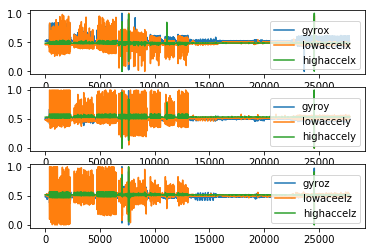

In [44]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.subplot(3, 1, 1)
plt.plot(gyrox, label='gyrox')   
plt.plot(lowaccelx, label= 'lowaccelx')
plt.plot(highaccelx, label= 'highaccelx') 
plt.legend(loc= 'lower right')     

plt.subplot(3,1,2)
plt.plot(gyroy, label= 'gyroy') 
plt.plot(lowaccely, label= 'lowaccely') 
plt.plot(highaccely, label= 'highaccely') 
plt.legend(loc= 'lower right')     

plt.subplot(3,1,3)
plt.plot(gyroz, label= 'gyroz') 
plt.plot(lowaccelz, label= 'lowaceelz') 
plt.plot(highaccelz, label= 'highaccelz') 
plt.legend(loc= 'lower right')     